In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [60]:
df = pd.read_csv('BMR_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  9000 non-null   int64  
 1   age      8989 non-null   float64
 2   weight   8993 non-null   float64
 3   height   8992 non-null   float64
 4   gender   8990 non-null   object 
 5   BMR      9000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 422.0+ KB


In [61]:
df.head()

,user_id,age,weight,height,gender,BMR
0,1243,27.0,73.066833,162.723887,Male,1576.878448
1,4971,28.0,77.730284,179.495414,Female,1536.656455
2,1629,57.0,85.704790,158.403052,Male,1697.694955
3,6201,47.0,67.012186,168.113746,Male,1471.524942
4,7833,36.0,79.929512,175.561126,Male,1743.147435


In [62]:
# Descriptive Statistics
df.describe()

,user_id,age,weight,height,BMR
count,9000.000000,8989.000000,8993.000000,8992.000000,9000.000000
mean,4500.500000,40.967293,69.624393,169.908044,1475.479479
std,2598.220545,13.588124,15.036687,9.894197,200.373795
min,1.000000,18.000000,11.484503,133.816706,690.711745
25%,2250.750000,29.000000,59.509476,163.323677,1340.847648
50%,4500.500000,41.000000,69.680270,169.893600,1475.039499
75%,6750.250000,53.000000,79.614839,176.620686,1610.698221
max,9000.000000,64.000000,124.454472,204.366568,2209.519518


In [63]:
# Checking for Missing Values
df.isnull().sum()

user_id     0
age        11
weight      7
height      8
gender     10
BMR         0
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

user_id    0
age        0
weight     0
height     0
gender     0
BMR        0
dtype: int64

In [66]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [67]:
#Outliers Detection
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers.sum()

user_id     0
age         0
weight     64
height     61
BMR        68
dtype: int64

In [10]:
#Not removing as there will be some extreme cases when it comes to height and weight


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

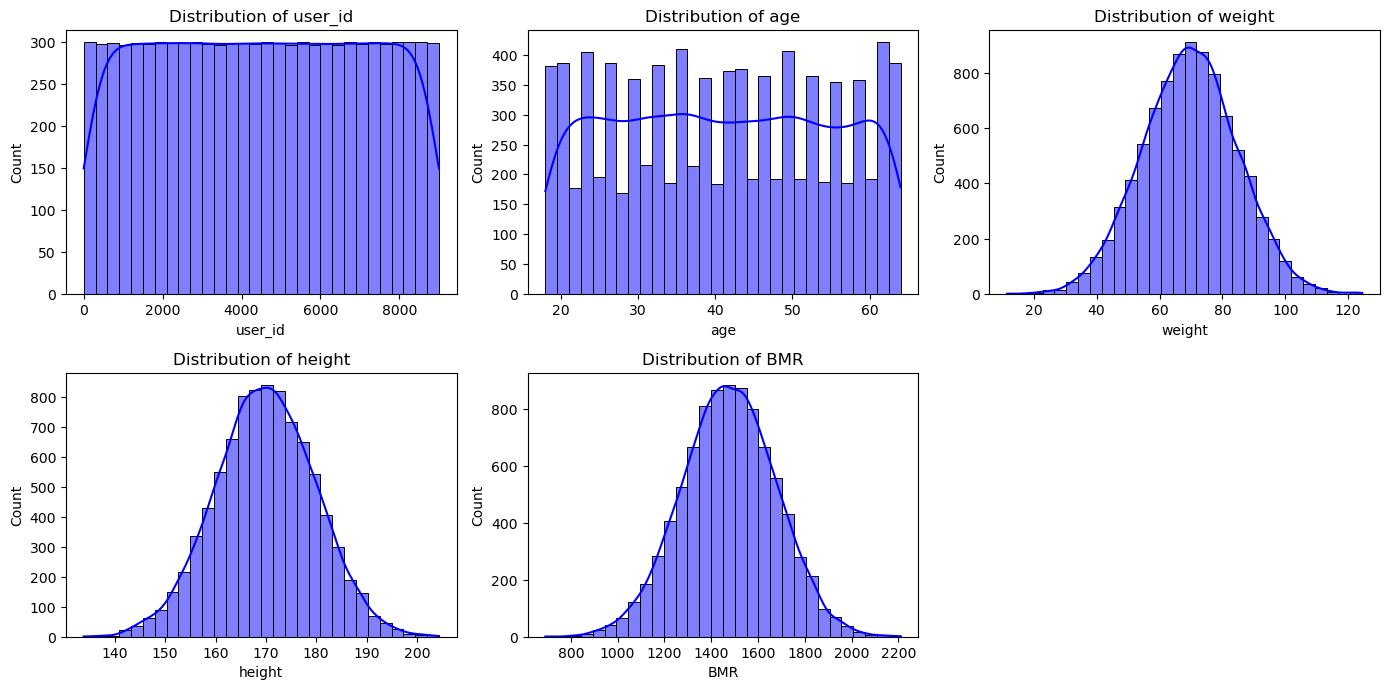

In [68]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [69]:
df.drop(columns=['user_id'],inplace=True)

In [70]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender']) 

df.head()

,age,weight,height,gender,BMR
0,27.0,73.066833,162.723887,1,1576.878448
1,28.0,77.730284,179.495414,0,1536.656455
2,57.0,85.704790,158.403052,1,1697.694955
3,47.0,67.012186,168.113746,1,1471.524942
4,36.0,79.929512,175.561126,1,1743.147435


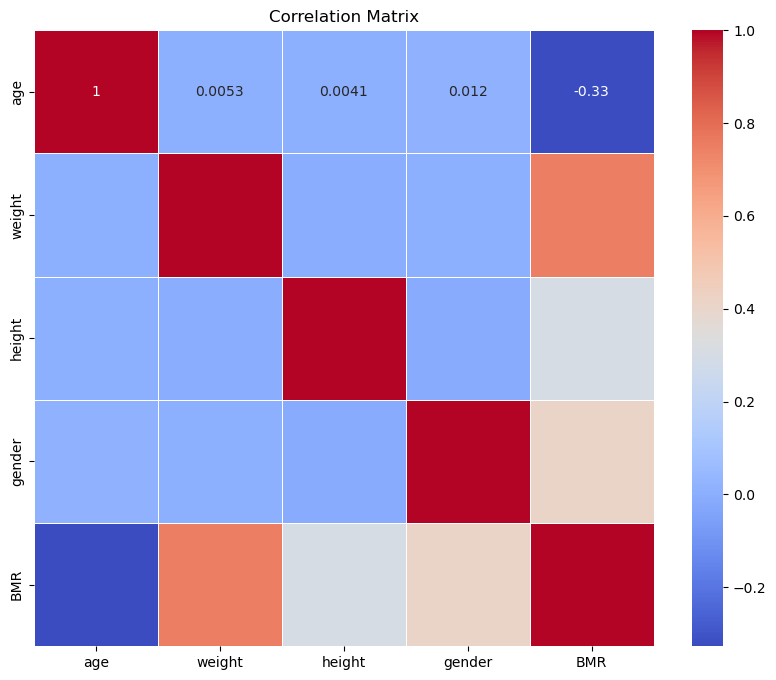

In [71]:
#Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

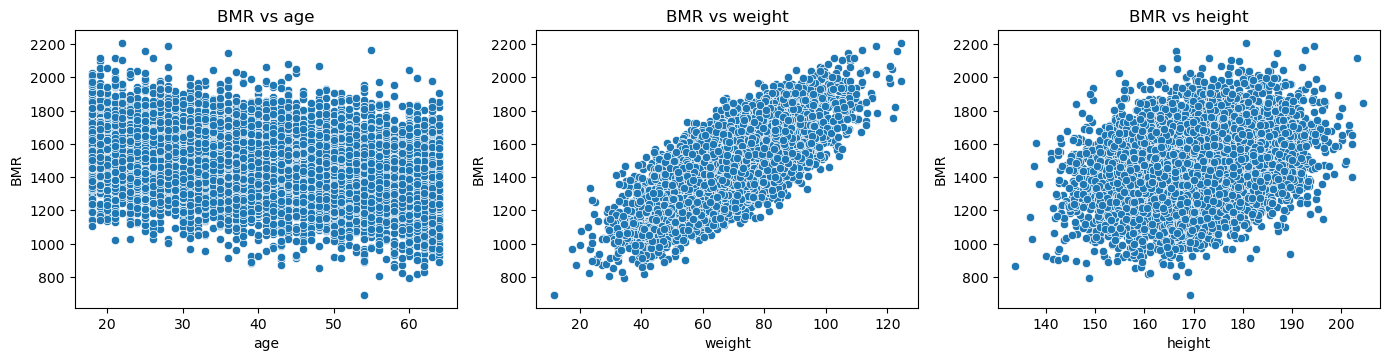

In [72]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns[1:-1], 1): 
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[column], y=df['BMR'])
    plt.title(f'BMR vs {column}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Plan Type Distribution')

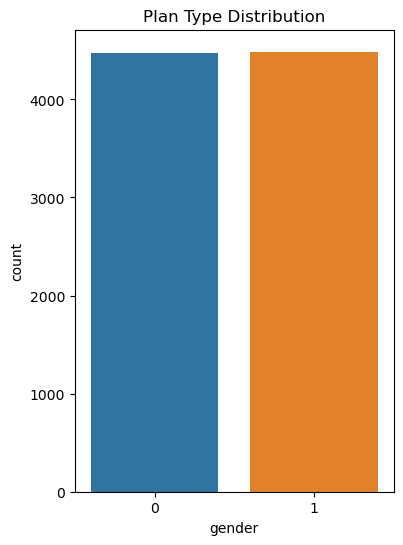

In [73]:
plt.figure(figsize=(14, 6))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Plan Type Distribution')
#0-female,1-male

## Model Building

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [74]:
X = df.drop(columns=['BMR'])
y = df['BMR'] 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    
    return train_r2, test_r2

In [78]:
#Linear Reg.
linear_model = LinearRegression()
train_r2_linear, test_r2_linear = evaluate_model(linear_model, X_train, X_test, y_train, y_test)


Model: LinearRegression
Train R2: 0.9361, Test R2: 0.9364
Train MSE: 2564.3667, Test MSE: 2554.6886


In [79]:
linear_model = LinearRegression()
train_r2_linear, test_r2_linear = evaluate_model(linear_model, X_train_scaled, X_test_scaled, y_train, y_test)


Model: LinearRegression
Train R2: 0.9361, Test R2: 0.9364
Train MSE: 2564.3667, Test MSE: 2554.6886


In [80]:
#DT
tree_model = DecisionTreeRegressor(random_state=42)
train_r2_tree, test_r2_tree = evaluate_model(tree_model, X_train, X_test, y_train, y_test)


Model: DecisionTreeRegressor
Train R2: 1.0000, Test R2: 0.8563
Train MSE: 0.0000, Test MSE: 5775.6494


In [81]:
#L2 Regularization
ridge_model = Ridge(alpha=1.0)
train_r2_ridge, test_r2_ridge = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test)


Model: Ridge
Train R2: 0.9361, Test R2: 0.9364
Train MSE: 2564.3674, Test MSE: 2554.6263


In [82]:
#L!
lasso_model = Lasso(alpha=0.1)
train_r2_lasso, test_r2_lasso = evaluate_model(lasso_model, X_train, X_test, y_train, y_test)


Model: Lasso
Train R2: 0.9361, Test R2: 0.9365
Train MSE: 2564.4070, Test MSE: 2553.7279


In [83]:
#Random Forest
forest_model = RandomForestRegressor(random_state=42)
train_r2_forest, test_r2_forest = evaluate_model(forest_model, X_train, X_test, y_train, y_test)


Model: RandomForestRegressor
Train R2: 0.9890, Test R2: 0.9243
Train MSE: 439.4234, Test MSE: 3042.6134


In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [85]:
#Hyperparameter Tuning
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           scoring='r2', cv=3, verbose=2, n_jobs=-1)

In [86]:
grid_search.fit(X_train, y_train)

best_forest_model = grid_search.best_estimator_
print(f"\nBest Random Forest Model: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Random Forest Model: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [87]:
train_r2_best_forest, test_r2_best_forest = evaluate_model(best_forest_model, X_train, X_test, y_train, y_test)


Model: RandomForestRegressor
Train R2: 0.9603, Test R2: 0.9276
Train MSE: 1593.2086, Test MSE: 2909.1018


In [88]:
#LR seems to be a generalised model

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [90]:
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [91]:
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist,
                                   n_iter=10, scoring='r2', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, scoring='r2', verbose=2)

In [92]:
best_forest_model = random_search.best_estimator_
print(f"Best Random Forest Model from RandomizedSearch: {random_search.best_params_}")
evaluate_model(best_forest_model, X_train, X_test, y_train, y_test)

Best Random Forest Model from RandomizedSearch: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}

Model: RandomForestRegressor
Train R2: 0.9637, Test R2: 0.9284
Train MSE: 1456.4689, Test MSE: 2876.3209


(0.9636977724461352, 0.9284301182058726)

In [93]:
#Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=500, learning_rate=0.1, max_depth=4)
train_r2_gbr, test_r2_gbr = evaluate_model(gbr_model, X_train, X_test, y_train, y_test)


Model: GradientBoostingRegressor
Train R2: 0.9590, Test R2: 0.9291
Train MSE: 1645.6871, Test MSE: 2848.9598


In [94]:
#XGBoost 
xgb_model = XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.1, max_depth=4)
train_r2_xgb, test_r2_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


Model: XGBRegressor
Train R2: 0.9566, Test R2: 0.9296
Train MSE: 1741.6044, Test MSE: 2828.3513


In [95]:
#SupportVectorRegressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
train_r2_svr, test_r2_svr = evaluate_model(svr_model, X_train, X_test, y_train, y_test)


Model: SVR
Train R2: 0.8366, Test R2: 0.6792
Train MSE: 6553.9375, Test MSE: 12892.4893


In [96]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'Lasso Regression', 'Optimized Random Forest',
          'Gradient Boosting', 'XGBoost', 'SVR']
train_scores = [train_r2_linear, train_r2_tree, train_r2_forest, train_r2_ridge, train_r2_lasso, train_r2_best_forest,
                train_r2_gbr, train_r2_xgb, train_r2_svr]
test_scores = [test_r2_linear, test_r2_tree, test_r2_forest, test_r2_ridge, test_r2_lasso, test_r2_best_forest,
               test_r2_gbr, test_r2_xgb, test_r2_svr]

comparison_df = pd.DataFrame({
    'Model': models,
    'Train R2 Score': train_scores,
    'Test R2 Score': test_scores
})

print("\nModel Comparison:\n")
print(comparison_df)


Model Comparison:

                     Model  Train R2 Score  Test R2 Score
0        Linear Regression        0.936084       0.936433
1            Decision Tree        1.000000       0.856288
2            Random Forest        0.989047       0.924292
3         Ridge Regression        0.936084       0.936435
4         Lasso Regression        0.936083       0.936457
5  Optimized Random Forest        0.960290       0.927614
6        Gradient Boosting        0.958982       0.929111
7                  XGBoost        0.956591       0.929624
8                      SVR        0.836644       0.679203


In [97]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import pickle

In [98]:
#Pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scaling
    ('model', LinearRegression())  # Linear regression model
])

In [99]:
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [101]:
with open("BMR_model.pkl", 'wb') as f:
    pickle.dump(pipeline, f)

In [103]:
with open('BMR_model.pkl', 'rb') as f:
    model_pipeline = pickle.load(f)

# Age: 23, Weight: 74kg, Height: 176cm, Gender: Male (1)
input_data = np.array([[23, 74, 176, 1]])

predicted_bmr = model_pipeline.predict(input_data)

# Display the prediction
print(f"Predicted BMR: {predicted_bmr[0]:.2f}")

Predicted BMR: 1730.81


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
